In [1]:
import perceval as pcvl
import numpy as np
from perceval.algorithm import Sampler


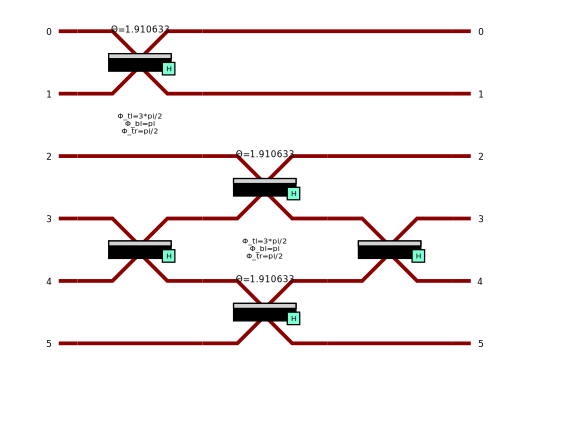

In [2]:
cnot = pcvl.Circuit(6, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
pcvl.pdisplay(cnot)

In [3]:
U = cnot.compute_unitary()

#Create 6 random vector, we suppose we can write each entry with a linear combination of 3 fock state
A = []
for i in range(4):
    vec = np.random.rand(3,1)
    normCst = np.sum(vec)
    A.append(vec/normCst)


Pour solutionner on veut écrire chaque vecteur d'entré en fonction des autres. \\
Ensuite, on veut faire intéragir chaque time bin ensemble.

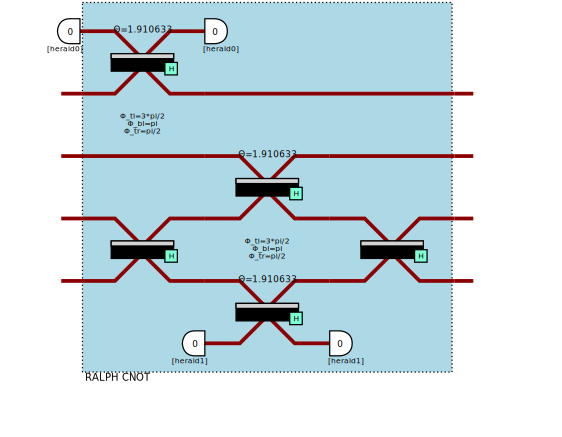

In [4]:
p = pcvl.Processor("Naive", cnot)
p.set_postprocess(lambda s: (s[1] or s[2]) and (s[3] or s[4]))
p.add_herald(0, 0)
p.add_herald(5, 0)

pcvl.pdisplay(p, recursive = True)

In [5]:
states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(p, states)
ca.compute(expected={"00": "00", "01": "01", "10": "11", "11": "10"})
pcvl.pdisplay(ca)
print("performance=%s, fidelity=%.3f%%" % (pcvl.simple_float(ca.performance)[1], ca.fidelity * 100))

,00,01,10,11
00,1,0,0,0
01,0,1,0,0
10,0,0,0,1
11,0,0,1,0


performance=1/9, fidelity=100.000%


$|\psi_{in}> = A |10,10> + B |01,01>\\
|\psi_{in}> = A |10> |\theta_0> + A |01> |\theta_1> + B(|10> |\theta_0> +  |01> |\theta_1>)\\
|\psi_{in}> = A |10>\\
$


In [6]:
circuit = pcvl.Circuit(2)
circuit.add((0,1), pcvl.BS())
pcvl.pdisplay(circuit)

Entry1 = pcvl.BasicState([1,1])
Entry2 = pcvl.BasicState([0,1])
Entry3 = pcvl.BasicState([1,0])
Entry4 = pcvl.BasicState([0,0])


# Syntax to compute the amplitudes
backend = pcvl.BackendFactory.get_backend("Naive")

simulator = backend(circuit)

## We can also use the Analyser module to compute a table of probabilities
## The Analyser uses a Processor to work with. A Processor aims at simulating a photonic source plugged into a circuit
## with a given backend.
## The main syntax is :
## >>> p = pcvl.Processor(backend_name, circuit, source)
p = pcvl.Processor("Naive",circuit)
analyzer1 = pcvl.algorithm.Analyzer(p, [Entry1], '*')
analyzer2 = pcvl.algorithm.Analyzer(p, [Entry2], '*')
analyzer3 = pcvl.algorithm.Analyzer(p, [Entry3], '*')
analyzer4 = pcvl.algorithm.Analyzer(p, [Entry4], '*')
pcvl.pdisplay(analyzer1)
pcvl.pdisplay(analyzer2)

D = analyzer4.output_states_list
pcvl.pdisplay(analyzer4)


,"|1,1>","|2,0>","|0,2>"
"|1,1>",0,1/2,1/2


,"|0,1>","|1,0>"
"|0,1>",1/2,1/2


,"|0,0>"
"|0,0>",0


In [7]:

A = analyzer1.output_states_list
B = analyzer2.output_states_list
C = analyzer3.output_states_list
D = analyzer4.output_states_list
theta = np.pi/3
State1 =  A[1] + A[2] 
State3 = C[0] + C[1]
Statein = State1 * np.sin(theta) + State3 * np.cos(theta)
State2 = (B[0] + B[1])  * np.cos(theta)
TP = State1 * State2
print(TP)

1/2*|2,0,0,1>+1/2*|0,2,0,1>+1/2*|2,0,1,0>+1/2*|0,2,1,0>


In [8]:
import matplotlib.pyplot as plt

A = analyzer1.output_states_list
B = analyzer2.output_states_list
C = analyzer3.output_states_list
D = analyzer4.output_states_list
statear = [A,B,C,D]
StateVec = []
for state in statear:
    for i in range(len(state)):
        if i == 0 :
            StateTemp = state[i]
        else :
            StateTemp = StateTemp + state[i]
    StateVec.append(StateTemp)

OutState = (StateVec[0] + StateVec[1]) * (StateVec[2] + StateVec[3])
print(OutState.n)

[1, 2, 3]


[StateVector(<class 'float'>, {<perceval.utils.statevector.BasicState object at 0x7fe206130f40>: 1, <perceval.utils.statevector.BasicState object at 0x7fe206130ef0>: 1, <perceval.utils.statevector.BasicState object at 0x7fe206130f90>: 1}), StateVector(<class 'float'>, {<perceval.utils.statevector.BasicState object at 0x7fe206132090>: 1, <perceval.utils.statevector.BasicState object at 0x7fe206132040>: 1}), StateVector(<class 'float'>, {<perceval.utils.statevector.BasicState object at 0x7fe206132180>: 1, <perceval.utils.statevector.BasicState object at 0x7fe206132130>: 1}), <perceval.utils.statevector.BasicState object at 0x7fe206132220>]
|1,1,0,1>
|2,0,0,1>
|0,2,0,1>
|1,1,1,0>
|2,0,1,0>
|0,2,1,0>


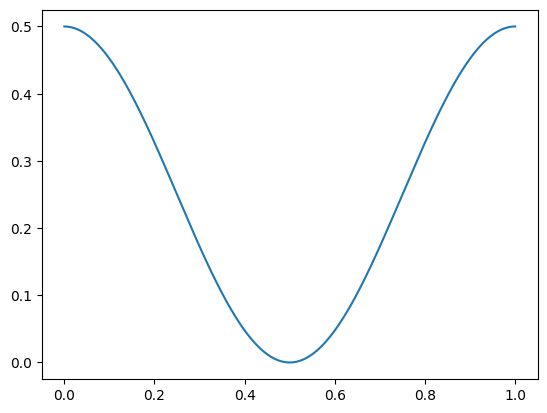

In [9]:
import matplotlib.pyplot as plt

A = analyzer1.output_states_list
B = analyzer2.output_states_list
C = analyzer3.output_states_list
D = analyzer4.output_states_list
statear = [A,B,C,D]
StateVec = []
for state in statear:
    for i in range(len(state)):
        if i == 0 :
            StateTemp = state[i]
        else :
            StateTemp = StateTemp + state[i]
    StateVec.append(StateTemp)

print(StateVec)

ls = []
for ii in B:
    for i in A:
        TP = pcvl.utils.statevector.tensorproduct([i,ii])
        ls.append(TP)
        print(TP)

graph = []
prob1 = [*analyzer1.distribution,*analyzer3.distribution]
prob2 = [*analyzer2.distribution,*analyzer4.distribution]

thetaar = np.linspace(0,np.pi,1000)
for theta in thetaar:
    for i in range(len(prob1)):
        if i == 0 :
            probls1 = np.sqrt(prob1[i]) * np.sin(theta)
        else :
            probls1 = np.append(probls1,np.sqrt(prob1[i]) * np.cos(theta))

    for i in range(len(prob2)):
        if i == 0 :
            probls2 = np.sqrt(prob2[i]) * np.cos(theta)
        else :
            probls2 = np.append(probls2,np.sqrt(prob2[i]) * np.sin(theta))



    Proba = np.multiply.outer(probls1,probls2)

    graph.append(Proba[1,0] ** 2 + Proba[4,0] ** 2 + Proba[2,1] ** 2 + Proba[3,1] ** 2)
plt.plot(thetaar/np.pi,graph)


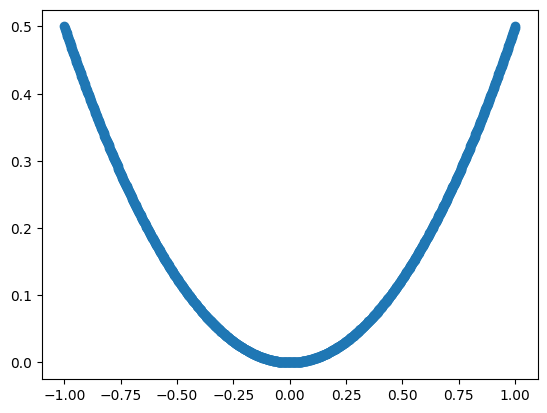

-1.0

In [12]:
import matplotlib.pyplot as plt

x = np.linspace(-1,1,1000)

f = x**2/2

plt.scatter(x,f)

plt.show()
np.cos(np.pi)